In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append(r'C:\Users\User\Documents\GitHub\respy')

In [3]:
from _cappres import BrooksCorey
from _initialization import ResInit

## Data input for reservoir initialization

In [4]:
rhow = 66.96
rhoo = 53
rhog = 3500*19/1.2/10.73/(175+460)

In [5]:
sm = ResInit(
    DWOC = 7475,
    DGOC = 7450,
    gradw = rhow/144,
    grado = rhoo/144,
    gradg = rhog/144,
    peow = 3.5,
    peog = 3.5*30/20
)

## Checking phase pressure values at certain depths

In [6]:
sm.waterpressure(sm.DWOC)

3490.5749999999994

In [7]:
sm.waterpressure(sm.DGOC)

3478.9499999999994

In [8]:
sm.oilpressure(sm.DWOC)

3494.0749999999994

In [9]:
sm.oilpressure(sm.DGOC)

3484.8736111111107

In [11]:
sm.fwl # free water level

7511.103151862464

## Plotting phase pressures at a given depth interval

In [12]:
dw = np.linspace(7300,7550)
do = np.linspace(7300,sm.fwl)
dg = np.linspace(7300,sm.DGOC)

In [13]:
pw = sm.waterpressure(dw)
po = sm.oilpressure(do)
pg = sm.gaspressure(dg)

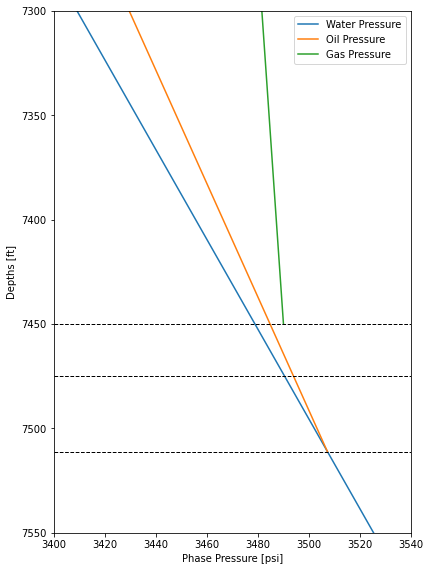

In [14]:
plt.figure(figsize=(6.4,9.6))

plt.plot(pw,dw,label="Water Pressure")
plt.plot(po,do,label="Oil Pressure")
plt.plot(pg,dg,label="Gas Pressure")

plt.hlines(sm.DWOC,xmin=3400,xmax=3540,color='k',linestyle='--',linewidth=1)
plt.hlines(sm.DGOC,xmin=3400,xmax=3540,color='k',linestyle='--',linewidth=1)
plt.hlines(sm.fwl,xmin=3400,xmax=3540,color='k',linestyle='--',linewidth=1)

plt.ylim((7550,7300))
plt.xlim((3400,3540))

plt.legend()

plt.ylabel("Depths [ft]")
plt.xlabel("Phase Pressure [psi]")

plt.show()

## Initializing capillary pressure models for water, oil and gas system

In [15]:
pcow = BrooksCorey(
    irreducible = 0.2,
    lamda = 2,
    entry = 3.5
    )

In [16]:
pcog = BrooksCorey(
    irreducible = 0.2,
    lamda = 2,
    entry = 3.5*30/20
    )

In [17]:
pcgw = BrooksCorey(
    irreducible = 0.2,
    lamda = 2,
    entry = 3.5*50/20
    )

## Checking saturation values at certain depths

In [18]:
sm.saturations(7449,pcow,pcog,pcgw)

(array(0.47036654), array(0.44250801), array(0.08712545))

In [19]:
sm.saturations(7428.1,pcow,pcog,pcgw)

(array(0.35130133), array(0.), array(0.64869867))

In [20]:
sm.saturations(7425,pcow,pcog,pcgw)

(array(0.33391322), array(0.), array(0.66608678))

## Plotting phase saturations at a given depth interval

In [21]:
depths = np.linspace(7300,7550,1000)

In [23]:
sw,so,sg = sm.saturations(depths,pcow,pcog,pcgw)

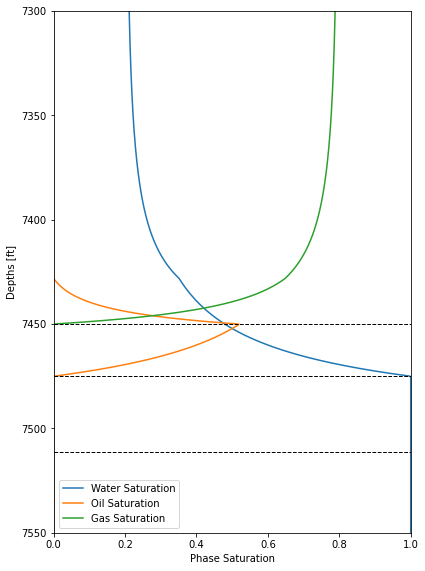

In [25]:
plt.figure(figsize=(6.4,9.6))

plt.plot(sw,depths,label="Water Saturation")
plt.plot(so,depths,label="Oil Saturation")
plt.plot(sg,depths,label="Gas Saturation")

plt.hlines(sm.DWOC,xmin=0,xmax=1,color='k',linestyle='--',linewidth=1)
plt.hlines(sm.DGOC,xmin=0,xmax=1,color='k',linestyle='--',linewidth=1)
plt.hlines(sm.fwl,xmin=0,xmax=1,color='k',linestyle='--',linewidth=1)

plt.ylim((7550,7300))
plt.xlim((0,1))

plt.legend()

plt.ylabel("Depths [ft]")
plt.xlabel("Phase Saturation")

plt.show()